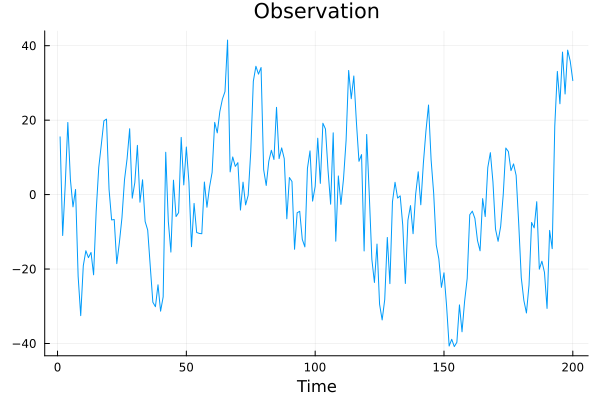

In [4]:
using DSP
using Plots

# Define a function to simulate lfilter behavior
function lfilter(b, a, x)
    y = filt(b, a, x)
    return y
end

# test
N = 200
x = randn(N)
htest = 10 * [1, 0.7, 0.7, 0.7, 0.3, 0]
y = lfilter(htest, [1.0], x) + 0.1 * randn(N)

plot(y, xlabel="Time", title="Observation", legend=false)


In [30]:
using StatsBase
using LinearAlgebra
using Statistics
using Plots
using ToeplitzMatrices

u = x
d = y
qmax = 18
mmse = zeros(qmax)

for q in 1:qmax
    c = crosscor(u, u)
    Ruu = Toeplitz(c) + 1e-6 * I  # Creating Toeplitz matrix and adding a small constant to the diagonal for regularization
    
    # Manual slicing to get cross-correlation for the specific lag
    Rdu = crosscor(d, u, q)[q:end]
    
    # Ensure that the dimensions are compatible for matrix multiplication
    w = pinv(Ruu) * Rdu  # Using the pseudo-inverse
    sigma2d = mean(d.^2)
    mmse[q] = sigma2d - dot(w, Rdu)
end

println("MMSE: ", mmse)

plot(1:qmax, mmse, xlabel="Order of the filter", ylabel="MMSE", title="MMSE as a function of the length of the identification filter", legend=false)


LoadError: MethodError: no method matching Toeplitz(::Vector{Float64})

[0mClosest candidates are:
[0m  Toeplitz(::AbstractVector, [91m::AbstractVector[39m)
[0m[90m   @[39m [36mToeplitzMatrices[39m [90m~/.julia/packages/ToeplitzMatrices/5gW1c/src/[39m[90m[4mtoeplitz.jl:26[24m[39m
[0m  Toeplitz([91m::AbstractMatrix[39m)
[0m[90m   @[39m [36mToeplitzMatrices[39m [90m~/.julia/packages/ToeplitzMatrices/5gW1c/src/[39m[90m[4mtoeplitz.jl:38[24m[39m
